## Data Analytics - Lab 1 - Random data visualisation and sampling
<br>
Jan Pomykacz<br>
Nr. albumu: 401623<br>
Grupa: czwartek, 9:30

In [57]:
#1. Created notebook

In [58]:
#2. Generated matrices
import numpy as np

uniform1 = np.random.uniform(0,1,1000)
normal1 = np.random.normal(0,1,1000)
normal_dev10 = np.random.normal(0,10,1000)

beta1 = np.random.beta(1,1,1000)
beta2 = np.random.beta(2,2,1000)
beta3 = np.random.beta(3,9,1000)

normal2d_1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 10000)
normal2d_2 = np.random.multivariate_normal([0,0], [[2,1],[1,2]], 10000)

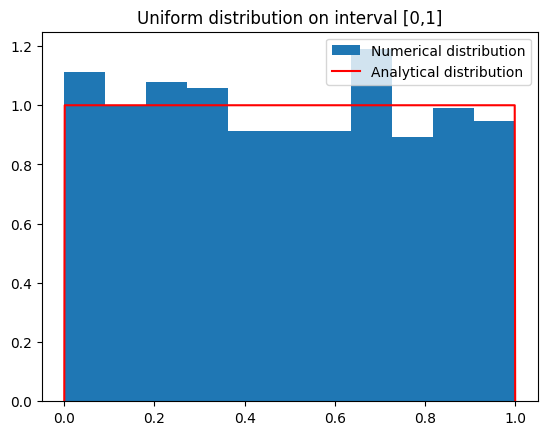

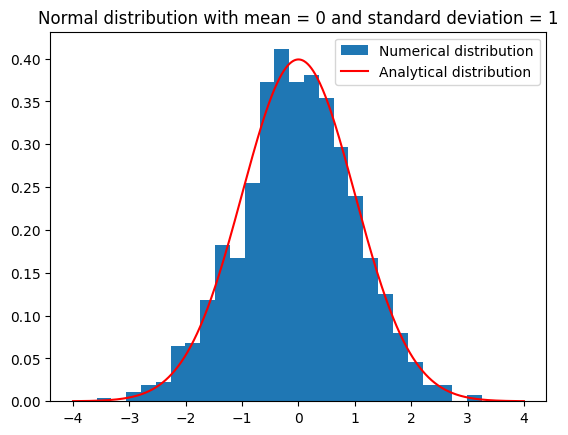

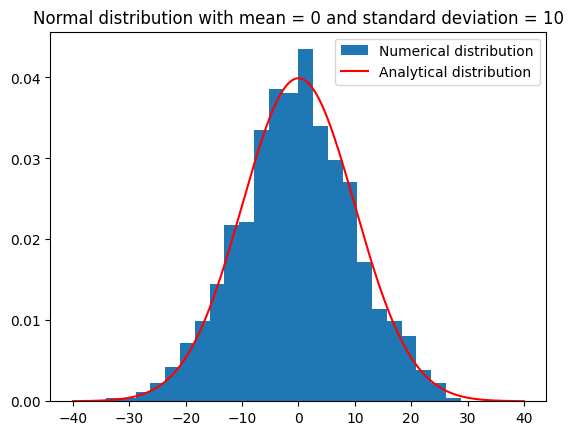

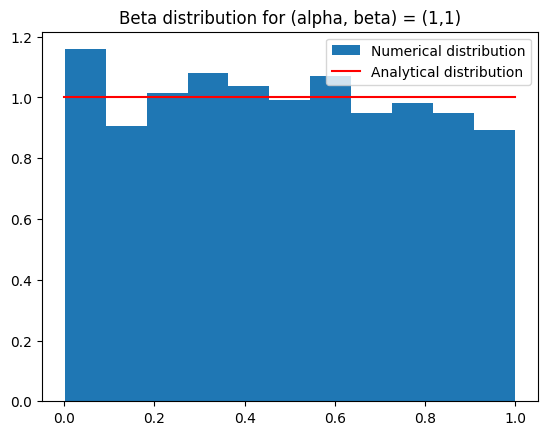

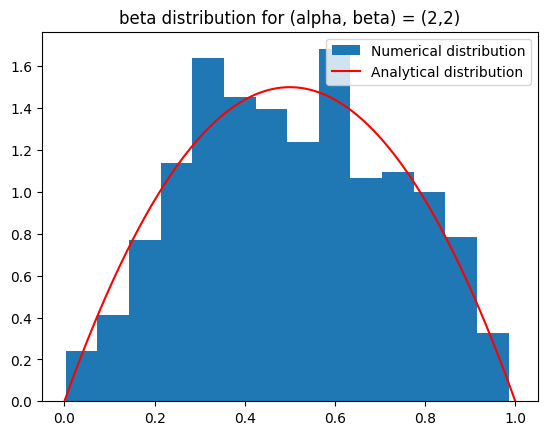

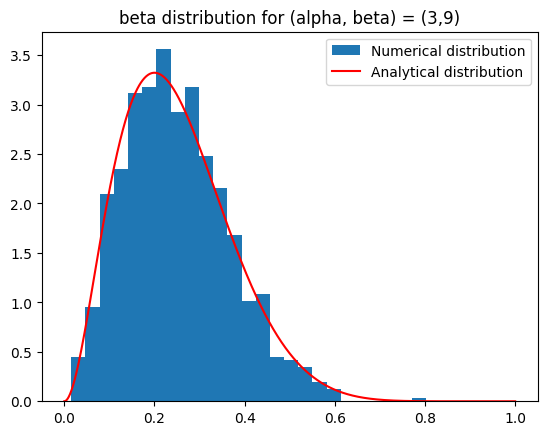

In [59]:
#3. Plotting histograms for 1d distribution
import matplotlib.pyplot as plt

from scipy.integrate import quad

# vector for plotting analytical prob. density function (functions defined as lambdas)
x = np.linspace(0,1,1000)

# some lambdas for plotting
uniform_normalized_lambda = lambda x: 1 if (x < 1 and x > 0) else 0
normal_distribution_lambda = lambda x, mi, sigma: np.exp(-0.5*((x-mi)/sigma)**2) / (sigma * (np.pi*2)**0.5)
integrand = lambda x, a, b : x**(a-1) * (1-x)**(b-1)
beta_func = lambda a,b : quad(integrand, 0, 1, args=(a,b))[0]
beta_dist = lambda x, a, b : x**(a-1) * (1-x)**(b-1) / beta_func(a,b)

plt.hist(uniform1, bins='auto', density=True, label="Numerical distribution")
plt.plot(x, [uniform_normalized_lambda(y) for y in x], 'red', label="Analytical distribution")
plt.title("Uniform distribution on interval [0,1]")
plt.legend()
plt.show()

x = np.linspace(-4,4,1000)
plt.hist(normal1, bins='auto', density=True, label="Numerical distribution")
plt.plot(x, [normal_distribution_lambda(y, 0, 1) for y in x], 'red', label="Analytical distribution")
plt.title("Normal distribution with mean = 0 and standard deviation = 1")
plt.legend()
plt.show()

x = np.linspace(-40,40,1000)
plt.hist(normal_dev10, bins='auto', density=True, label="Numerical distribution")
plt.plot(x, [normal_distribution_lambda(y, 0, 10) for y in x], 'red', label="Analytical distribution")
plt.title("Normal distribution with mean = 0 and standard deviation = 10")
plt.legend()
plt.show()

x = np.linspace(0,1,1000)
plt.hist(beta1, bins='auto', density=True, label="Numerical distribution")
plt.plot(x, [beta_dist(y, 1, 1) for y in x], 'red', label="Analytical distribution")
plt.title("Beta distribution for (alpha, beta) = (1,1)")
plt.legend()
plt.show()

plt.hist(beta2, bins='auto', density=True, label="Numerical distribution")
plt.plot(x, [beta_dist(y, 2, 2) for y in x], 'red', label="Analytical distribution")
plt.title("beta distribution for (alpha, beta) = (2,2)")
plt.legend()
plt.show()

plt.hist(beta3, bins='auto', density=True, label="Numerical distribution")
plt.plot(x, [beta_dist(y, 3, 9) for y in x], 'red', label="Analytical distribution")
plt.title("beta distribution for (alpha, beta) = (3,9)")
plt.legend()
plt.show()

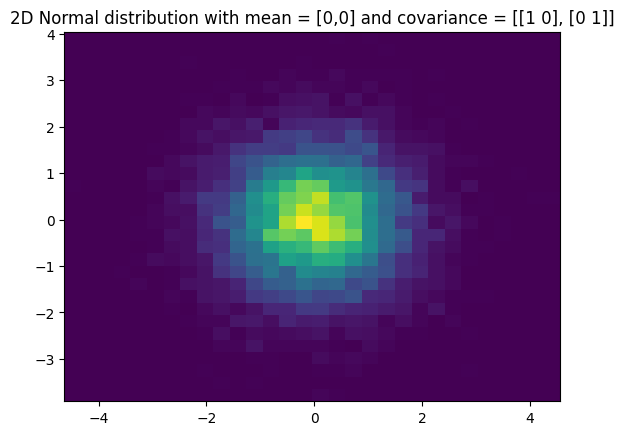

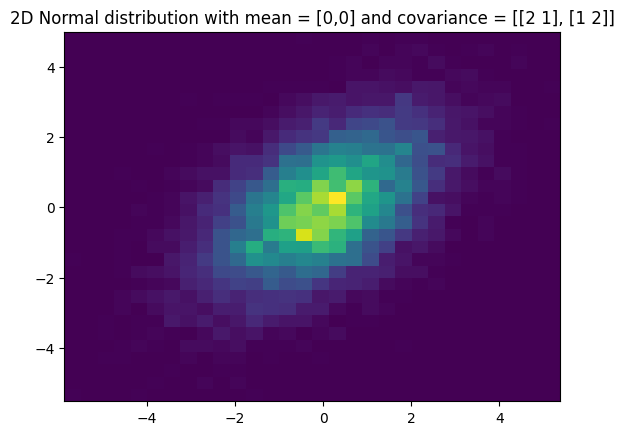

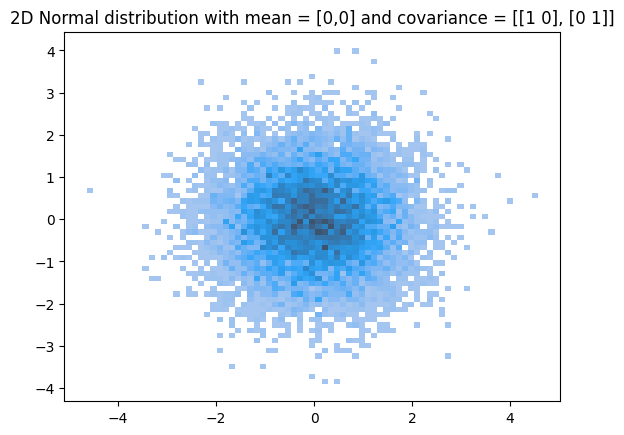

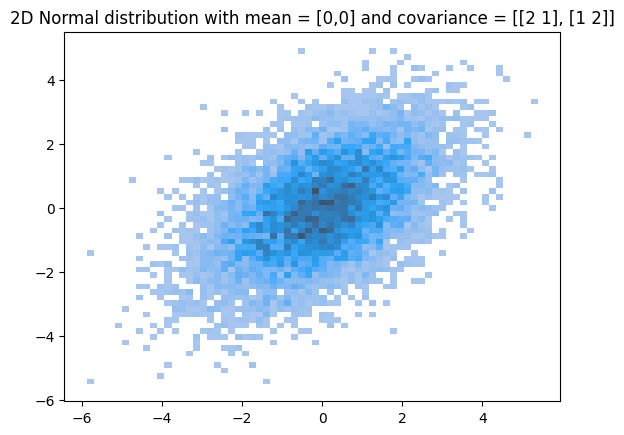

In [60]:
#4. Plotted 2d distributions
 
# not enough bins (less than 10) will make plot 'low resolution' and it wont visualize shape of the distribution properly
# too much bins (more than 150) will make the plot 'sparse' and likewise wont visualize shape of the distribution properly
plt.hist2d(x=normal2d_1[:,0], y=normal2d_1[:,1], bins=30, density=True)
plt.title("2D Normal distribution with mean = [0,0] and covariance = [[1 0], [0 1]]")
plt.show()

plt.hist2d(x=normal2d_2[:,0], y=normal2d_2[:,1], bins=30, density=True)
plt.title("2D Normal distribution with mean = [0,0] and covariance = [[2 1], [1 2]]")
plt.show()

#comparison of the plots with seaborn. Seaborn has more customization options, also it allows for automatic bins detection.
import seaborn as sb

sb.histplot(data=normal2d_1, x=normal2d_1[:,0], y=normal2d_1[:,1])
plt.title("2D Normal distribution with mean = [0,0] and covariance = [[1 0], [0 1]]")
plt.show()
sb.histplot(data=normal2d_1, x=normal2d_2[:,0], y=normal2d_2[:,1])
plt.title("2D Normal distribution with mean = [0,0] and covariance = [[2 1], [1 2]]")
plt.show()

In [61]:
#5. Generated points
alpha = np.random.normal(2, 0.1, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
x = np.random.normal(0, 3, 1000)
sigma = np.abs(np.random.normal(0, 1, 1000))

mi = alpha + beta*x
y = np.random.normal(mi, sigma, 1000)

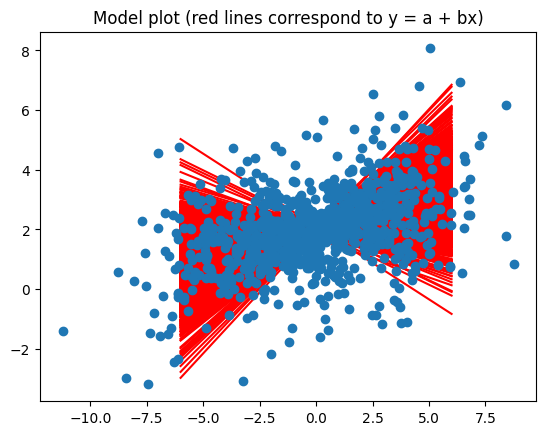

In [62]:
#6. Plotting the above
x_begin = np.ones(1000) * -6
x_end = np.ones(1000) * 6

plt.plot([x_begin,x_end], [alpha + beta*x_begin,alpha + beta*x_end], 'red')
plt.plot(x,y, 'o')
plt.title("Model plot (red lines correspond to y = a + bx)")
plt.show()
